## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

In [3]:
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
oilprice_data = pd.read_csv (r'C:\Users\zhufa\OneDrive\Documents\GitHub\2022-02-DSI-WE\Fang Zhu\Dataset\oil and gas.csv',parse_dates=[1])
type(oilprice_data)

oilprice_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23004 entries, 0 to 23003
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Symbol    23004 non-null  object        
 1   Date      23004 non-null  datetime64[ns]
 2   Open      23004 non-null  float64       
 3   High      23004 non-null  float64       
 4   Low       23004 non-null  float64       
 5   Close     23004 non-null  float64       
 6   Volume    23004 non-null  int64         
 7   Currency  23004 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
oilprice_data.head


<bound method NDFrame.head of             Symbol       Date     Open     High      Low    Close  Volume  \
0        Brent Oil 2000-01-04  23.9000  24.7000  23.8900  24.3900   32509   
1        Brent Oil 2000-01-05  24.2500  24.3700  23.7000  23.7300   30310   
2        Brent Oil 2000-01-06  23.5500  24.2200  23.3500  23.6200   44662   
3        Brent Oil 2000-01-07  23.5700  23.9800  23.0500  23.0900   34826   
4        Brent Oil 2000-01-10  23.0400  23.7800  23.0400  23.7300   26388   
...            ...        ...      ...      ...      ...      ...     ...   
22999  Heating Oil 2022-06-06   4.3026   4.4084   4.2565   4.3601   45144   
23000  Heating Oil 2022-06-07   4.3877   4.4025   4.2466   4.3206   50479   
23001  Heating Oil 2022-06-08   4.3177   4.3512   4.2800   4.3143   47557   
23002  Heating Oil 2022-06-09   4.3319   4.4667   4.2529   4.4037   46599   
23003  Heating Oil 2022-06-10   4.4187   4.5135   4.3155   4.3667       0   

      Currency  
0          USD  
1          

<AxesSubplot:xlabel='Date'>

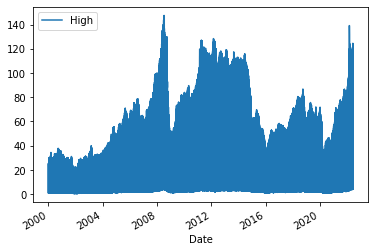

In [23]:
oilprice_data.plot.line(x="Date", y = "High")


In [8]:
oilprice_data.groupby('Date').head(10)


,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.9000,24.7000,23.8900,24.3900,32509,USD
1,Brent Oil,2000-01-05,24.2500,24.3700,23.7000,23.7300,30310,USD
2,Brent Oil,2000-01-06,23.5500,24.2200,23.3500,23.6200,44662,USD
3,Brent Oil,2000-01-07,23.5700,23.9800,23.0500,23.0900,34826,USD
4,Brent Oil,2000-01-10,23.0400,23.7800,23.0400,23.7300,26388,USD
...,...,...,...,...,...,...,...,...
22999,Heating Oil,2022-06-06,4.3026,4.4084,4.2565,4.3601,45144,USD
23000,Heating Oil,2022-06-07,4.3877,4.4025,4.2466,4.3206,50479,USD
23001,Heating Oil,2022-06-08,4.3177,4.3512,4.2800,4.3143,47557,USD
23002,Heating Oil,2022-06-09,4.3319,4.4667,4.2529,4.4037,46599,USD


In [9]:
oilprice_data[['Symbol','Date']].value_counts()

Symbol         Date      
Brent Oil      2000-01-04    1
Heating Oil    2015-01-26    1
               2015-02-20    1
               2015-02-19    1
               2015-02-18    1
                            ..
Crude Oil WTI  2007-08-14    1
               2007-08-13    1
               2007-08-10    1
               2007-08-09    1
Natural Gas    2022-06-10    1
Length: 23004, dtype: int64

In [10]:
oilprice_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,23004.0,33.390719,36.049898,-14.0000,2.73945,14.3645,60.7025,146.30
High,23004.0,33.885592,36.515506,0.5085,2.78300,15.5325,61.5525,147.50
Low,23004.0,32.872165,35.559484,-40.3200,2.69400,13.8005,59.8100,144.25
Close,23004.0,33.392588,36.061469,-37.6300,2.73975,14.3250,60.6450,146.08
Volume,23004.0,138581.581638,156543.893211,0.0000,34910.75000,77004.0000,193327.5000,1774383.00


In [11]:
oilprice_byMonth = oilprice_data.groupby(oilprice_data.Date.dt.month)
list(oilprice_byMonth)

[(1,
              Symbol       Date     Open     High      Low    Close  Volume  \
  0        Brent Oil 2000-01-04  23.9000  24.7000  23.8900  24.3900   32509   
  1        Brent Oil 2000-01-05  24.2500  24.3700  23.7000  23.7300   30310   
  2        Brent Oil 2000-01-06  23.5500  24.2200  23.3500  23.6200   44662   
  3        Brent Oil 2000-01-07  23.5700  23.9800  23.0500  23.0900   34826   
  4        Brent Oil 2000-01-10  23.0400  23.7800  23.0400  23.7300   26388   
  ...            ...        ...      ...      ...      ...      ...     ...   
  22903  Heating Oil 2022-01-25   2.6500   2.6707   2.6154   2.6691   49391   
  22904  Heating Oil 2022-01-26   2.6668   2.7521   2.6661   2.7440   41966   
  22905  Heating Oil 2022-01-27   2.7396   2.8333   2.7261   2.7945   35724   
  22906  Heating Oil 2022-01-28   2.8289   2.8640   2.7698   2.7855   23962   
  22907  Heating Oil 2022-01-31   2.8150   2.8160   2.7457   2.7592    5310   
  
        Currency  
  0          USD  
  1   

In [12]:
import numpy as np


oilprice_data['Open'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        23.9000
1        24.2500
2        23.5500
3        23.5700
4        23.0400
          ...   
22999     4.3026
23000     4.3877
23001     4.3177
23002     4.3319
23003     4.4187
Name: Open, Length: 23004, dtype: float64>

In [13]:
oilprice_data[['Symbol','High']].max()

Symbol    Natural Gas
High            147.5
dtype: object

In [14]:
oilprice_data['Year'] = oilprice_data.Date.dt.year
oilprice_data['Month'] = oilprice_data.Date.dt.month
oilprice_data['Day'] = oilprice_data.Date.dt.day
oilprice_data['AvgPrice'] =(oilprice_data['High'] + oilprice_data['Low'])/2
oilprice_data.head()


,Symbol,Date,Open,High,Low,Close,Volume,Currency,Year,Month,Day,AvgPrice
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509,USD,2000,1,4,24.295
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310,USD,2000,1,5,24.035
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662,USD,2000,1,6,23.785
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826,USD,2000,1,7,23.515
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388,USD,2000,1,10,23.410


In [15]:
oilprice_data[['Symbol','Year','Month','Day','AvgPrice']].head()

,Symbol,Year,Month,Day,AvgPrice
0,Brent Oil,2000,1,4,24.295
1,Brent Oil,2000,1,5,24.035
2,Brent Oil,2000,1,6,23.785
3,Brent Oil,2000,1,7,23.515
4,Brent Oil,2000,1,10,23.410


<AxesSubplot:xlabel='Year'>

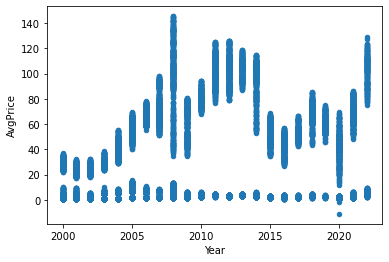

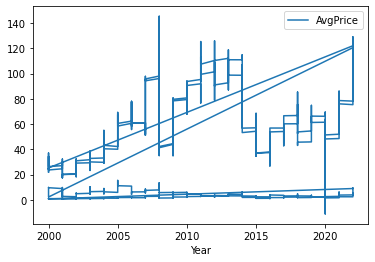

In [21]:
oilprice_data.plot.scatter(x="Year", y = "AvgPrice")
oilprice_data.plot.line(x="Year", y = "AvgPrice")

In [ ]:

oilPrice_dist = oilprice_data.quantile([i/20 for i in range(0,20)])
oilPrice_dist["quantile"] = oilPrice_dist.index
oilPrice_dist

,Open,High,Low,Close,Volume,Year,Month,Day,AvgPrice,quantile
0.00,-14.00000,0.508500,-40.32000,-37.63000,0.00,2000.0,1.0,1.0,-11.235000,0.00
0.05,1.03874,1.063405,1.01318,1.03852,14480.50,2001.0,1.0,2.0,1.039360,0.05
0.10,1.63879,1.664630,1.61293,1.63793,20183.70,2002.0,2.0,4.0,1.640000,0.10
0.15,1.94218,1.964645,1.91250,1.93968,25239.60,2003.0,2.0,5.0,1.939218,0.15
0.20,2.24260,2.275000,2.20640,2.24272,29885.40,2004.0,3.0,7.0,2.241200,0.20
0.25,2.73945,2.783000,2.69400,2.73975,34910.75,2005.0,3.0,8.0,2.740075,0.25
0.30,2.99955,3.043000,2.95755,2.99758,40803.40,2006.0,4.0,10.0,3.001185,0.30
0.35,3.51500,3.589000,3.44000,3.50700,47736.15,2008.0,5.0,11.0,3.512542,0.35
0.40,4.35000,4.429200,4.25320,4.34720,55764.80,2009.0,5.0,13.0,4.339200,0.40
0.45,6.14935,6.313700,6.00000,6.13970,64692.00,2010.0,6.0,14.0,6.158200,0.45
